# Notebook - ICD 6

In [1]:
!pip install keras
!pip install tensorflow
!pip install Augmentor
!pip install tensorflow-io
!pip install IPython
!pip install textattack

In [8]:
# Importing necessary functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [9]:
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    brightness_range = (0.5, 1.5))

In [10]:
path = '/home/andylmao/icd2024/classes/images/'
# Loading a sample image
img = load_img(path+'test_image.jpg') # this is a PIL image
# Converting the input sample image to an array
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
# Reshaping the input image
x = x.reshape((1, ) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

In [11]:
import os

print(os.getcwd())

/home/andylmao/icd2024/classes


In [14]:
# Generating and saving 5 augmented samples using the above defined parameters.
i = 0
for batch in datagen.flow(x, batch_size = 1, save_to_dir ='/home/andylmao/icd2024/classes/new_images/', save_prefix ='image', save_format ='jpg'):
    i += 1
    if i > 5:
        break

### Using Augmentor

In [15]:
# Importing necessary library
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline(path)

Initialised with 1 image(s) found.
Output directory set to /home/andylmao/icd2024/classes/images/output.

In [16]:
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(5)

Processing <PIL.Image.Image image mode=1 size=598x598 at 0x7F89C958DEE0>: 100%|█


## Audio Data Preparation and Augmentation

In [1]:
#importing necessary libraries
import tensorflow as tf
import tensorflow_io as tfio
import IPython
import numpy as np

In [3]:
path = '/home/andylmao/icd2024/classes/audios/'
#to play the audio
IPython.display.Audio(path+"test_audio.wav")

In [4]:
#loading and reading the audio file.
audio_data = tfio.audio.AudioIOTensor(path+"test_audio.wav")
print(audio_data)
print(audio_data.shape)
print(audio_data.rate)

<AudioIOTensor: shape=[172696      1], dtype=<dtype: 'int16'>, rate=48000>
tf.Tensor([172696      1], shape=(2,), dtype=int64)
tf.Tensor(48000, shape=(), dtype=int32)


2024-09-13 16:41:32.383970: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA


In [5]:
#perform slicing
audio_sl = audio_data[5000:]
print('Shape After Slicing :',audio_sl.shape)

#last dimension is ignored.
audio_t = tf.squeeze(audio_sl, axis=[-1])
print('Shape After squeezing:',audio_t.shape)

Shape After Slicing : (167696, 1)
Shape After squeezing: (167696,)


In [6]:
#to play the audio,
from IPython.display import Audio
Audio(audio_t.numpy(), rate=audio_data.rate.numpy())

tf.Tensor(
[ 0.00024415  0.00027467  0.00027467 ... -0.00018311 -0.00018311
 -0.00015259], shape=(167696,), dtype=float32)


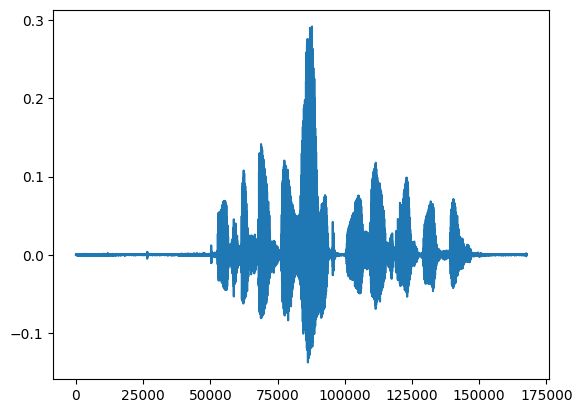

In [7]:
# convert tensor to float datatype,.
tensor = tf.cast(audio_t, tf.float32) / 32767.0
print(tensor)

#plot the graph.
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tensor.numpy())
plt.show()

### Trimming

In [8]:
# Trim silence from the beginning and end of the audio signal
trimed = tfio.audio.trim(tensor,
                         axis=0,
                         epsilon=0.02)
print('Trimmed :',trimed)

Trimmed : tf.Tensor([ 52781 143687], shape=(2,), dtype=int64)


START:52781,
STOP :143687
Trimmed Audio shape: (90906,)


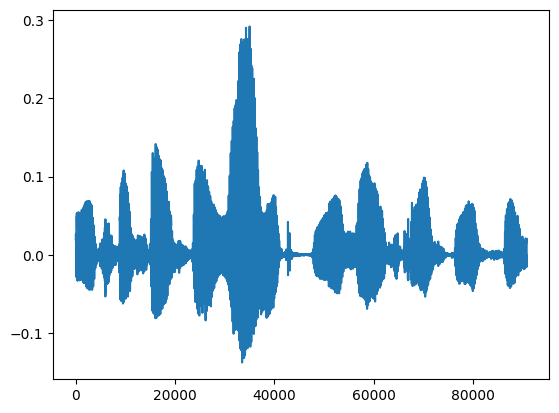

In [9]:
#Mention the stating and ending limit
start = trimed[0]
stop = trimed[1]
print("START:{},\nSTOP :{}".format(start.numpy(),stop.numpy()))

trimmed_audio = tensor[start:stop]
print('Trimmed Audio shape:',trimmed_audio.shape)

plt.figure()
plt.plot(trimmed_audio.numpy())

In [10]:
#to play the audio,
Audio(trimmed_audio.numpy(), rate=audio_data.rate.numpy())

### Fade in and out

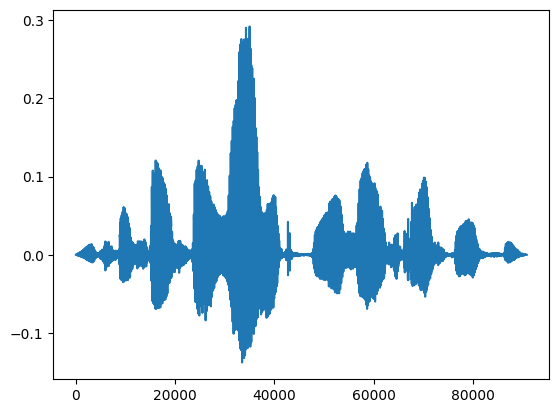

In [12]:
#Apply a fade-in and fade_out effect with a duration
audio_fade = tfio.audio.fade(trimmed_audio, fade_in=20000, fade_out=20000, mode="logarithmic")

plt.figure()
#plotting the faded audio.
plt.plot(audio_fade.numpy())

In [13]:
#to plat the audio
Audio(audio_fade.numpy(), rate=audio_data.rate.numpy())

### Adding noise

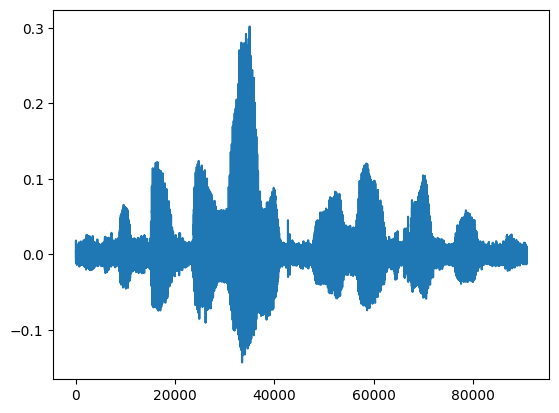

In [14]:
# adding noise to audio
noise_factor = 0.005
noise = np.random.randn(len(audio_fade))
audio_augmented = audio_fade + noise_factor * noise

plt.figure()
plt.plot(audio_augmented.numpy())

In [15]:
Audio(audio_augmented.numpy(), rate=audio_data.rate.numpy())

### Shifting

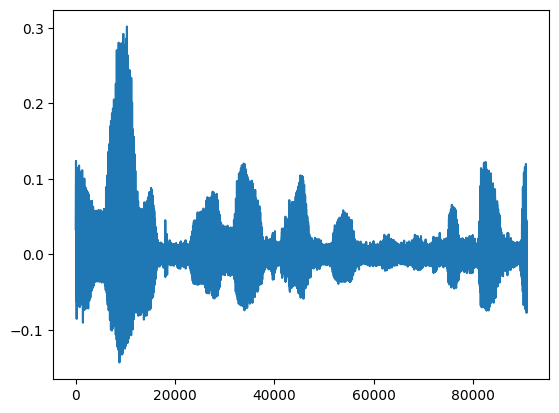

In [16]:
shift_max = 1
shift_direction = 'right'
shift = np.random.randint(audio_data.rate.numpy() * shift_max)
if shift_direction == 'right':
    shift = -shift
audio_shifted = np.roll(audio_augmented.numpy(), shift)

# Set to silence for heading/ tailing
#if shift > 0:
    #audio_shifted[:shift] = 0
#else:
    #audio_shifted[shift:] = 0

plt.figure()
plt.plot(audio_shifted)

In [17]:
Audio(audio_shifted, rate=audio_data.rate.numpy())

### Changing the pitch

In [19]:
pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 3.7 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:0010.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


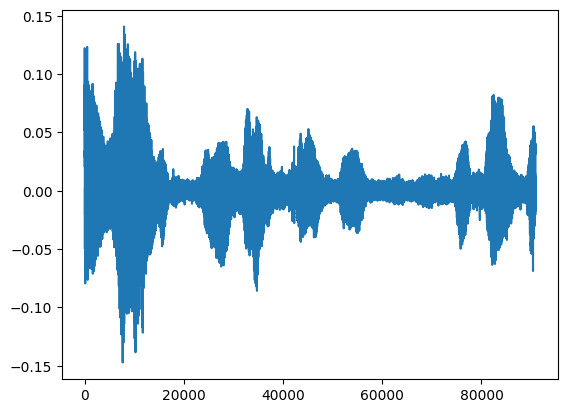

In [20]:
import librosa
audio_pitch = librosa.effects.pitch_shift(audio_shifted, sr=audio_data.rate.numpy(), n_steps=4)
plt.figure()
plt.plot(audio_pitch)

In [21]:
Audio(audio_pitch, rate=audio_data.rate.numpy())

### Changing the speed

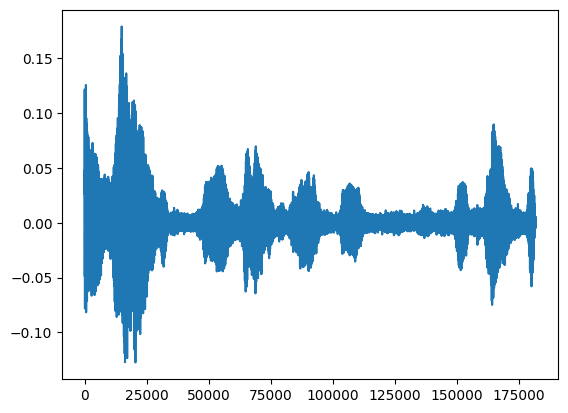

In [22]:
audio_speed = librosa.effects.time_stretch(audio_pitch, rate=0.5)
plt.figure()
plt.plot(audio_speed)

In [23]:
Audio(audio_speed, rate=audio_data.rate.numpy())

## Data augmentation in text

### Synonym

In [24]:
from textattack.augmentation import WordNetAugmenter
text = "start each day with positive thoughts and make your day"
wordnet_aug = WordNetAugmenter()
wordnet_aug.augment(text)

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/andylmao/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andylmao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /home/andylmao/nltk_data...
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/andylmao/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /home/andylmao/nltk_data...
[nltk_data] Downloading package punkt to /home/andylmao/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /home/andylmao/nltk_data...


['start each day with irrefutable thoughts and make your day']

### Embedding

In [25]:
from textattack.augmentation import EmbeddingAugmenter
embed_aug = EmbeddingAugmenter()
embed_aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|████████████████████████████████████████| 481M/481M [00:57<00:00, 8.39MB/s]
textattack: Unzipping file /home/andylmao/.cache/textattack/tmp7vcdmdww.zip to /home/andylmao/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['started each day with positive thoughts and make your day']

### Char swap

In [26]:
from textattack.augmentation import CharSwapAugmenter
charswap_aug = CharSwapAugmenter()
charswap_aug.augment(text)

['start each day with positive thIughts and make your day']

### Augments words by using the transformation methods, which combines:
*   Name Replacement
*   Location Replacement
*   Number Alteration
*   Contraction/Extension

In [28]:
from textattack.augmentation import CheckListAugmenter
checklist_aug = CheckListAugmenter()
checklist_aug.augment(text)

['start each day with positive thoughts and make your day']

### Synonym, deletion, order swaps and random synonym insertion

In [29]:
from textattack.augmentation import EasyDataAugmenter
eda_aug = EasyDataAugmenter()
eda_aug.augment(text)

[nltk_data] Downloading package omw-1.4 to /home/andylmao/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['idea start each day with positive thoughts and make your day',
 'start each day with positive and make your day',
 'start each thoughts with positive day and make your day',
 'start each day with electropositive thoughts and make your day']